In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Data Path
data_path = "Resources/properties.csv"
# data_path_2 = "Resources/blank2.csv"

# Read the mouse data and the study results
data = pd.read_csv(data_path)
# data2 = pd.read_csv(data_path_2)

data_df = pd.DataFrame(data)
data_df.head()
# Merge
# data_pd = pd.merge(data, data2, how = "", on = "")


,Unnamed: 0,Address,AreaName,Price ($),lat,lng
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118


,ID,Address,AreaName,Price,lat,lng
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
...,...,...,...,...,...,...
25346,124922,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793
25347,124924,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,624900,45.441273,-75.532745
25348,124925,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249
25349,124928,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040


In [27]:
# Clean up data
data_df = data_df.loc[:, ~data_df.columns.str.contains("^Unnamed")]
data_df

,Address,AreaName,Price ($),lat,lng
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
...,...,...,...,...,...
25346,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793
25347,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,624900,45.441273,-75.532745
25348,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249
25349,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040


In [28]:
data_df.rename(columns={'Price ($)': 'Price'}, inplace=True)
data_df

,Address,AreaName,Price,lat,lng
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
...,...,...,...,...,...
25346,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793
25347,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,624900,45.441273,-75.532745
25348,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249
25349,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040


In [17]:
data_df.rename(columns={'Unnamed: 0': 'ID', 'Price ($)': 'Price'}, inplace=True)
data_df.columns

Address       object
AreaName      object
Price ($)      int64
lat          float64
lng          float64
dtype: object

In [35]:

clean_data_df = data_df.drop_duplicates(subset=['Address'],keep="last")
# clean_data_df["Price ($)"] = clean_data_df["Price ($)"].map('{:,}'.format)


clean_data_df

,Address,AreaName,Price,lat,lng
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
...,...,...,...,...,...
25346,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793
25347,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,624900,45.441273,-75.532745
25348,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249
25349,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040


In [36]:
clean_data_df.describe()

,Price,lat,lng
count,2.359400e+04,23594.000000,23594.000000
mean,5.601153e+05,37.159054,-85.356639
std,8.389035e+05,83.994103,74.096029
min,0.000000e+00,-999.000000,-999.000000
25%,2.200000e+05,43.412430,-80.287590
50%,3.699000e+05,43.724766,-79.488228
75%,6.016875e+05,44.491020,-79.092318
max,3.250000e+07,53.851017,1.074519


In [37]:
#Eliminating houses with price <= 100000 and >= 10000000
clean_data_df = clean_data_df[(clean_data_df['Price'] >= 100000) & (clean_data_df['Price'] <= 10000000)]
clean_data_df

,Address,AreaName,Price,lat,lng
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
...,...,...,...,...,...
25346,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793
25347,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,624900,45.441273,-75.532745
25348,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249
25349,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040


In [39]:
grouped = clean_data_df.groupby(["AreaName"])
area_data_df = grouped.agg({"Price": ["mean","median","var","std","sem"]})
area_data_df.dropna()


Price                                         \
                                 mean     median           var           std   
AreaName                                                                       
Acton                    3.793000e+05   349900.0  1.887327e+10  1.373800e+05   
Agincourt                4.465360e+05   339000.0  9.585616e+10  3.096065e+05   
Agincourt North          2.200000e+06  2200000.0  0.000000e+00  0.000000e+00   
Ainslie Wood             5.299000e+05   529900.0  0.000000e+00  0.000000e+00   
Ainslie Wood East        5.650837e+05   479000.0  6.825471e+10  2.612560e+05   
...                               ...        ...           ...           ...   
York                     8.271286e+05   860000.0  1.033138e+10  1.016434e+05   
York Mills               4.166803e+06  3989000.0  7.064036e+12  2.657825e+06   
York University Heights  5.588903e+05   509450.0  1.093232e+11  3.306405e+05   
Yorkdale                 1.467500e+05   146750.0  2.016125e+09  4.490128e+04   
Zephyr                   1.249616e+06  1199400.0  2.433300e+11  4.932849e+05   

                                        
                                   sem  
AreaName                                
Acton                     79316.391748  
Agincourt                 31764.952106  
Agincourt North               0.000000  
Ainslie Wood                  0.000000  
Ainslie Wood East         63363.891158  
...                                ...  
York                      38417.597123  
York Mills               566650.296915  
York University Heights   56704.380520  
Yorkdale                  31750.000000  
Zephyr                   201382.725804  

[875 rows x 5 columns]

<AxesSubplot:title={'center':'Top 20 Areas - Houses on Sale in ON'}>

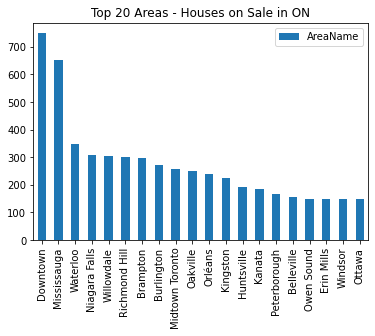

In [41]:
#Creating a TOP 20 Rank by area
top_20 = pd.DataFrame(clean_data_df['AreaName'].value_counts())
top_20.sort_values(by='AreaName')
top_20[0:20].plot(kind='bar', title='Top 20 Areas - Houses on Sale in ON')

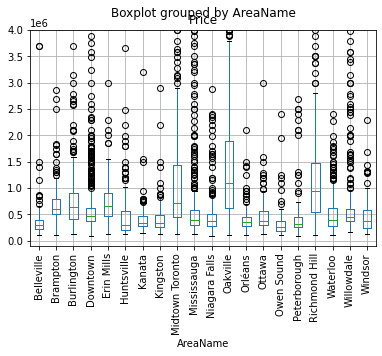

In [42]:
#Boxplot 
top_region = list(top_20[0:20].index)
area = clean_data_df[clean_data_df['AreaName'].isin(top_region)]
#print(topAreasNames)
box_ax = area.boxplot(column='Price', by='AreaName', rot=90, grid=True)
box_ax.set_ylim(-1e5, 4e6)

plt.show()

<AxesSubplot:title={'center':'Top 20 Mean Prices - by Area'}, xlabel='AreaName'>

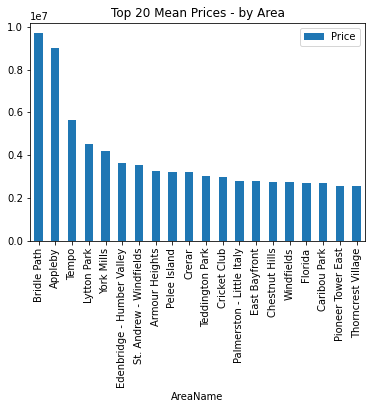

In [45]:
#Mean Price by Area(Top 20)
clean_data_dropped = clean_data_df.drop(['Address','lat','lng'], axis=1)
mean_prices = clean_data_dropped.groupby(['AreaName']).mean().sort_values(by='Price', axis=0, ascending=False)
mean_prices_top20 = mean_prices[0:20] 
mean_prices_top20.plot(kind='bar', title='Top 20 Mean Prices - by Area')